# Music genre classification using Machine Learning
##### Feature-based classification of music genre using *Random Forest,* *SVM,* *Logistic Regression,* *Decision Tree,* *K-Nearest Neighbors (KNN)* with Scikit-Learn.

In [88]:
# Scikit-Learn installation
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [120]:
# All the imports
import os
import random
import pickle
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [121]:
# Load the file with all the features of the audio files labled with the genre name using the arff module. 
data = arff.loadarff('Genre.arff')
df = pd.DataFrame(data[0])

In [122]:
df.head()

,highlevel_danceability_value,highlevel_equalization_profile_value,highlevel_excitement_value,highlevel_intensity_value,highlevel_speech_music_value,highlevel_voice_instrumental_value,loudness_dynamic_complexity_dvar,loudness_dynamic_complexity_mean,loudness_dynamic_complexity_var,loudness_larm_dvar,...,tonal_chords_strength_dvar,tonal_chords_strength_mean,tonal_chords_strength_var,tonal_dissonance_dvar,tonal_dissonance_mean,tonal_dissonance_var,tonal_key_mode_value,tonal_key_strength_value,tonal_tuning_equal_tempered_deviation_value,genre
0,0.206472,0.372766,0.029087,0.093526,b'music',b'voice',-0.411385,0.024215,-0.201421,-0.532833,...,-0.255337,1.140774,-1.490395,0.494393,0.149725,-0.013634,b'minor',0.526779,-0.205793,b'blu'
1,-0.368479,0.372766,1.341977,0.093526,b'music',b'voice',-0.349921,-0.015672,-0.173045,-0.452769,...,-0.121114,0.497749,-0.901662,0.347729,-0.517640,0.184709,b'major',-0.129683,-0.667979,b'blu'
2,-0.631747,0.372766,-1.283803,-1.324366,b'speech',b'instrumental',4.235612,5.779127,3.973258,1.713613,...,-0.190639,1.408974,-0.502029,1.174496,-1.454160,2.144489,b'major',-1.022781,0.937795,b'blu'
3,-0.190116,0.372766,1.341977,0.093526,b'music',b'voice',-0.307576,0.068818,-0.216986,-0.519222,...,0.257633,0.622749,1.399033,0.791524,-0.601227,0.873673,b'major',0.074454,-0.406373,b'blu'
4,0.588278,0.372766,1.341977,0.802473,b'music',b'instrumental',-0.332032,-1.078238,0.350680,-0.765884,...,-0.309481,1.301291,-0.708195,-0.093155,0.287901,-0.644858,b'major',0.919307,-0.917709,b'blu'


In [123]:
# Decodification of the genre names
# The genre column is encoded as bytes so we need to decode them to string
unique_genres = df.genre.unique()
genre_dict = {}

for element in unique_genres:
  genre_dict[element] = element.decode()

df = df.replace({'genre': genre_dict})

In [92]:
# The abbreviated genre names are replaced by their full names for better readibility.
full_names_dictionary = { 'blu': 'Blues', 'cla': 'Classical', 'cou': 'Country', 'dis': 'Disco', 'hip': 'Hip-hop', 'jaz': 'Jazz',\
                         'met': 'Metal', 'pop': 'Pop', 'reg': 'Reggae', 'roc': 'Rock'}

df = df.replace({'genre': full_names_dictionary})
df

,highlevel_danceability_value,highlevel_equalization_profile_value,highlevel_excitement_value,highlevel_intensity_value,highlevel_speech_music_value,highlevel_voice_instrumental_value,loudness_dynamic_complexity_dvar,loudness_dynamic_complexity_mean,loudness_dynamic_complexity_var,loudness_larm_dvar,...,tonal_chords_strength_dvar,tonal_chords_strength_mean,tonal_chords_strength_var,tonal_dissonance_dvar,tonal_dissonance_mean,tonal_dissonance_var,tonal_key_mode_value,tonal_key_strength_value,tonal_tuning_equal_tempered_deviation_value,genre
0,0.206472,0.372766,0.029087,0.093526,b'music',b'voice',-0.411385,0.024215,-0.201421,-0.532833,...,-0.255337,1.140774,-1.490395,0.494393,0.149725,-0.013634,b'minor',0.526779,-0.205793,Blues
1,-0.368479,0.372766,1.341977,0.093526,b'music',b'voice',-0.349921,-0.015672,-0.173045,-0.452769,...,-0.121114,0.497749,-0.901662,0.347729,-0.517640,0.184709,b'major',-0.129683,-0.667979,Blues
2,-0.631747,0.372766,-1.283803,-1.324366,b'speech',b'instrumental',4.235612,5.779127,3.973258,1.713613,...,-0.190639,1.408974,-0.502029,1.174496,-1.454160,2.144489,b'major',-1.022781,0.937795,Blues
3,-0.190116,0.372766,1.341977,0.093526,b'music',b'voice',-0.307576,0.068818,-0.216986,-0.519222,...,0.257633,0.622749,1.399033,0.791524,-0.601227,0.873673,b'major',0.074454,-0.406373,Blues
4,0.588278,0.372766,1.341977,0.802473,b'music',b'instrumental',-0.332032,-1.078238,0.350680,-0.765884,...,-0.309481,1.301291,-0.708195,-0.093155,0.287901,-0.644858,b'major',0.919307,-0.917709,Blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-1.427786,0.372766,-1.283803,0.802473,b'music',b'instrumental',0.559649,-0.183165,0.622257,0.084044,...,-0.366172,0.318132,0.748104,-0.745670,-0.226276,-0.095535,b'major',1.322209,0.061931,Rock
796,-0.078540,0.372766,1.341977,0.802473,b'music',b'voice',-0.108340,-0.584670,0.119356,-0.314633,...,-0.284281,0.096984,-0.089204,-1.394305,1.206240,-1.225032,b'major',0.498037,-0.269263,Rock
797,-1.045058,0.372766,-1.283803,0.093526,b'music',b'instrumental',-0.156503,-0.975097,0.297968,-0.315637,...,-0.408811,-1.467413,-0.965934,-0.713245,0.178487,0.002003,b'major',-0.624586,-1.079980,Rock
798,-0.227043,0.372766,-1.283803,0.802473,b'music',b'instrumental',-0.125633,-1.068999,0.274430,-0.725643,...,-0.329513,1.205735,-0.789754,-0.415943,0.386272,-0.764152,b'major',0.417567,-0.522861,Rock


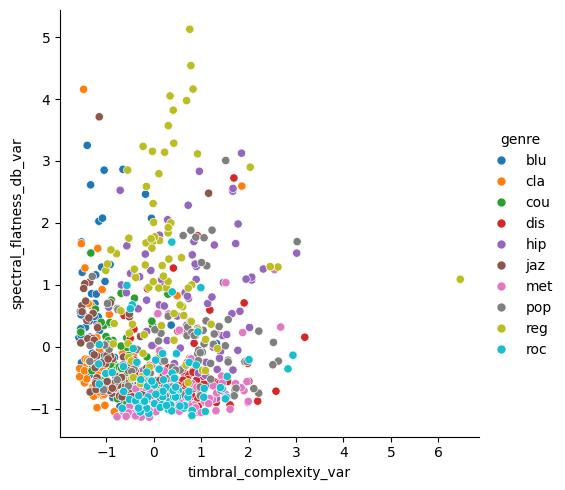

In [126]:
# Let's visualize all the music genres plotted according to two random features. We use the seaborn library to make a scatterplot of the two random features.
feature_names = df.keys()[:-1]
x_name = random.choice(feature_names)
y_name = random.choice(feature_names)

while x_name == y_name:
  y_name = random.choice(feature_names)

sns.relplot(x = x_name, y = y_name, hue = "genre", data = df);

In [127]:
df_modif = df.copy()

In [128]:
df_modif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Columns: 241 entries, highlevel_danceability_value to genre
dtypes: float64(237), object(4)
memory usage: 1.5+ MB


In [130]:
# SVM classification requires numerical data, so we remove the non-numeric columns from the dataframe (except for the genre label).
non_floats = []
for col in df_modif.iloc[:,:-1]:
    if df_modif[col].dtypes != "float64":
        non_floats.append(col)
df_modif = df_modif.drop(columns=non_floats)

In [131]:
df_modif.columns

Index(['highlevel_danceability_value', 'highlevel_equalization_profile_value',
       'highlevel_excitement_value', 'highlevel_intensity_value',
       'loudness_dynamic_complexity_dvar', 'loudness_dynamic_complexity_mean',
       'loudness_dynamic_complexity_var', 'loudness_larm_dvar',
       'loudness_larm_mean', 'loudness_larm_var',
       ...
       'tonal_chords_number_rate_value', 'tonal_chords_strength_dvar',
       'tonal_chords_strength_mean', 'tonal_chords_strength_var',
       'tonal_dissonance_dvar', 'tonal_dissonance_mean',
       'tonal_dissonance_var', 'tonal_key_strength_value',
       'tonal_tuning_equal_tempered_deviation_value', 'genre'],
      dtype='object', length=238)

In [132]:
# We use a MinMaxScaler to normalize the features between 0 and 1.
L = len(df_modif.columns)

min_max_scaler = preprocessing.MinMaxScaler()
df_modif.iloc[:,:L-1] = min_max_scaler.fit_transform(df_modif.iloc[:,:L-1].values)

In [133]:
# It is important to check how many samples there are for each genre to see if the data is balanced.
df_modif.genre.value_counts()
# The given data is already well balance so no further preprocessing is necesary.

genre
blu    80
cla    80
cou    80
dis    80
hip    80
jaz    80
met    80
pop    80
reg    80
roc    80
Name: count, dtype: int64

In [134]:
df_modif.head()

,highlevel_danceability_value,highlevel_equalization_profile_value,highlevel_excitement_value,highlevel_intensity_value,loudness_dynamic_complexity_dvar,loudness_dynamic_complexity_mean,loudness_dynamic_complexity_var,loudness_larm_dvar,loudness_larm_mean,loudness_larm_var,...,tonal_chords_number_rate_value,tonal_chords_strength_dvar,tonal_chords_strength_mean,tonal_chords_strength_var,tonal_dissonance_dvar,tonal_dissonance_mean,tonal_dissonance_var,tonal_key_strength_value,tonal_tuning_equal_tempered_deviation_value,genre
0,0.205850,0.666667,0.5,0.428571,0.107662,0.292795,0.198971,0.014467,0.681261,0.009460,...,0.0625,0.007070,0.747172,0.033120,0.311535,0.738473,0.209772,0.796003,0.191377,blu
1,0.145356,0.666667,1.0,0.428571,0.113567,0.287893,0.202254,0.017938,0.535865,0.008445,...,0.1875,0.011545,0.647790,0.089968,0.289410,0.616727,0.240663,0.677660,0.107248,blu
2,0.117656,0.666667,0.0,0.142857,0.554058,1.000000,0.682076,0.111860,0.328332,0.037206,...,0.1250,0.009227,0.788623,0.128556,0.414132,0.445880,0.545883,0.516658,0.399539,blu
3,0.164123,0.666667,1.0,0.428571,0.117634,0.298276,0.197169,0.015057,0.560316,0.012745,...,0.1250,0.024175,0.667109,0.312123,0.356359,0.601479,0.347964,0.714461,0.154866,blu
4,0.246022,0.666667,1.0,0.571429,0.115285,0.157317,0.262861,0.004363,0.521184,0.009884,...,0.1875,0.005264,0.771980,0.108649,0.222900,0.763680,0.111464,0.866765,0.061790,blu


In [135]:
# All the features are put into a matrix
X = df_modif.iloc[:,:L-1].values 
# Genre tags are converted to categorical data
df_modif.genre = pd.Categorical(df_modif.genre)
# Each genre is encoded as a numrical code
y = np.array(df_modif.genre.cat.codes)

In [142]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [136]:
# The data is split between a test set and a train set. In this case I'm using a 80/20 distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

# Check sizes of input and output vectors
print("Size of train features matrix: ",X_train.shape, ", Size of train output vector: ",y_train.shape)
print("Size of test features matrix: ",X_test.shape, ", Size of test output vector: ",y_test.shape)

Size of train features matrix:  (640, 237) , Size of train output vector:  (640,)
Size of test features matrix:  (160, 237) , Size of test output vector:  (160,)


In [137]:
# Create an SVM object with a linear kernel
clf = svm.SVC(kernel='linear')

# Fit the model to the training data (X_train contains the features and y_train contains the genre labels)
clf.fit(X_train, y_train)

# Use the trained model to predict the genre labels of the test data
y_pred = clf.predict(X_test)

In [138]:
# Use 10-fold cross-validation to compute the accuracy of the model
accuracy = cross_val_score(clf, X, y, cv=10)
mean_accuracy = accuracy.mean()

print("Accuracy: ", mean_accuracy)

Accuracy:  0.825


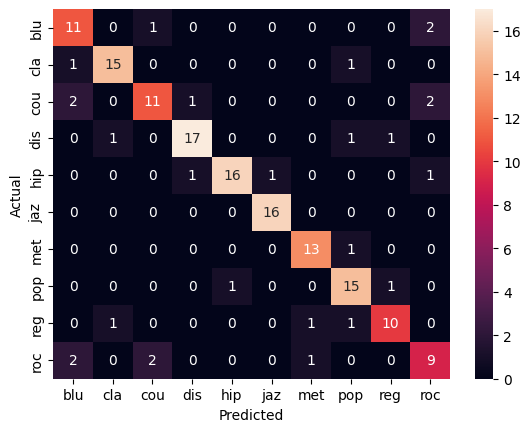

In [139]:
# Plot a confusion matrix to visualize how well the model is performing
classes = np.unique(df_modif.genre)
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
sns.heatmap(conf_mat, annot = True);

<Axes: >

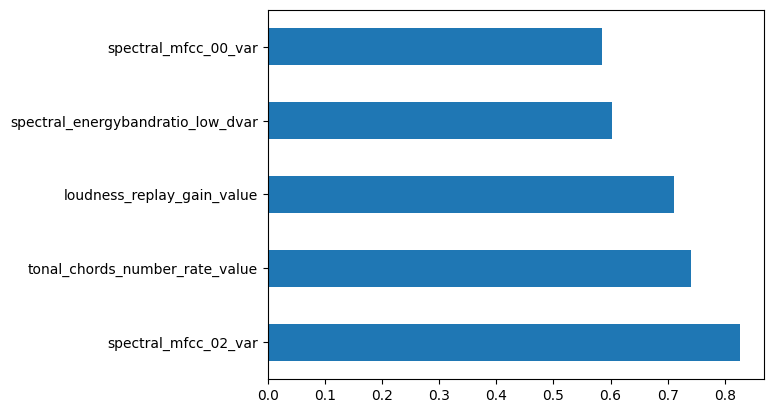

In [140]:
# Find the 5 features with the largest weight on the classification
pd.Series(abs(clf.coef_[0]), index=df_modif.iloc[:,:L-1].columns).nlargest(5).plot(kind='barh')

In [141]:
# save
with open('model3.pkl','wb') as f:
    pickle.dump(clf,f)

## Results
The classification is not perfect but we can see that the missclassifications is probably due to the similarity between genres (country/blues, classical/jazz, rock/country ...)

**1 .LogisticRegression Model**             
**2. KNeighborsClassifier**             
**3. DecisionTreeClassifier**               
**4. RandomForestClassifier**           
**5. SVM**

**1 .LogisticRegression Model**

In [107]:
import pandas as pd
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the file with all the features of the audio files labeled with the genre name using the arff module.
data = arff.loadarff('Genre.arff')
df = pd.DataFrame(data[0])

# Convert byte strings to normal strings for all columns that are of type byte
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Display the first few rows and column names to understand the data structure
print(df.head())
print(df.columns)

# Identify the target variable (e.g., 'tonal_key_mode_value')
target_column = 'tonal_key_mode_value'  # Replace with the actual column name if 'genre' is incorrect

# Encoding the target variable to numeric values
label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])

# One-hot encode categorical features in the dataset
df = pd.get_dummies(df)

# Splitting the dataset into features and target
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluating the model
print("--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

C:\Users\Symen-A\AppData\Local\Temp\ipykernel_23684\3857117006.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


   highlevel_danceability_value  highlevel_equalization_profile_value  \
0                      0.206472                              0.372766   
1                     -0.368479                              0.372766   
2                     -0.631747                              0.372766   
3                     -0.190116                              0.372766   
4                      0.588278                              0.372766   

   highlevel_excitement_value  highlevel_intensity_value  \
0                    0.029087                   0.093526   
1                    1.341977                   0.093526   
2                   -1.283803                  -1.324366   
3                    1.341977                   0.093526   
4                    1.341977                   0.802473   

  highlevel_speech_music_value highlevel_voice_instrumental_value  \
0                        music                              voice   
1                        music                              vo

C:\Users\Symen-A\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       115
           1       0.53      0.56      0.54        45

    accuracy                           0.74       160
   macro avg       0.68      0.68      0.68       160
weighted avg       0.74      0.74      0.74       160

Accuracy for Logistic Regression: 0.74



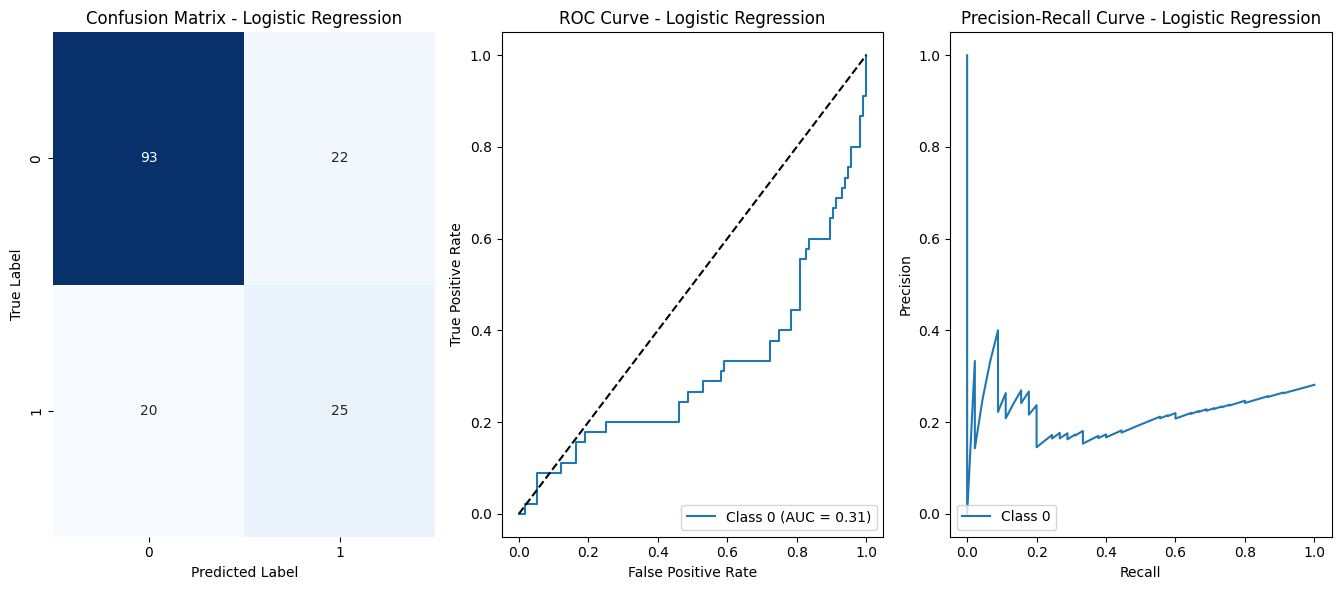

In [108]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_train and y_test are numpy arrays
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Fit the model
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred_log_reg = log_reg.predict(X_test)
y_proba_log_reg = log_reg.predict_proba(X_test)

# Classification Report
print("Classification Report for Logistic Regression:\n")
print(classification_report(y_test, y_pred_log_reg))

# Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# ROC Curve for each class
plt.subplot(1, 4, 2)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_log_reg[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_proba_log_reg[:, i])
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Precision-Recall Curve for each class
plt.subplot(1, 4, 3)
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_proba_log_reg[:, i])
    plt.plot(recall, precision, label=f'Class {classes[i]}')

plt.title('Precision-Recall Curve - Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy for Logistic Regression: {accuracy_log_reg:.2f}\n")

plt.tight_layout()
plt.show()

**2. KNeighborsClassifier**

In [109]:
import pandas as pd
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the file with all the features of the audio files labeled with the genre name using the arff module.
data = arff.loadarff('Genre.arff')
df = pd.DataFrame(data[0])

# Convert byte strings to normal strings for all columns that are of type byte
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Display the first few rows and column names to understand the data structure
print(df.head())
print(df.columns)

# Identify the target variable (e.g., 'tonal_key_mode_value')
target_column = 'tonal_key_mode_value'  # Replace with the actual column name if 'genre' is incorrect

# Encoding the target variable to numeric values
label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])

# One-hot encode categorical features in the dataset
df = pd.get_dummies(df)

# Splitting the dataset into features and target
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Predicting on the test set
y_pred_knn = knn.predict(X_test)

# Evaluating the model
print("--- K-Nearest Neighbors ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


   highlevel_danceability_value  highlevel_equalization_profile_value  \
0                      0.206472                              0.372766   
1                     -0.368479                              0.372766   
2                     -0.631747                              0.372766   
3                     -0.190116                              0.372766   
4                      0.588278                              0.372766   

   highlevel_excitement_value  highlevel_intensity_value  \
0                    0.029087                   0.093526   
1                    1.341977                   0.093526   
2                   -1.283803                  -1.324366   
3                    1.341977                   0.093526   
4                    1.341977                   0.802473   

  highlevel_speech_music_value highlevel_voice_instrumental_value  \
0                        music                              voice   
1                        music                              vo

C:\Users\Symen-A\AppData\Local\Temp\ipykernel_23684\4203792774.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


NameError: name 'y_proba_knn' is not defined

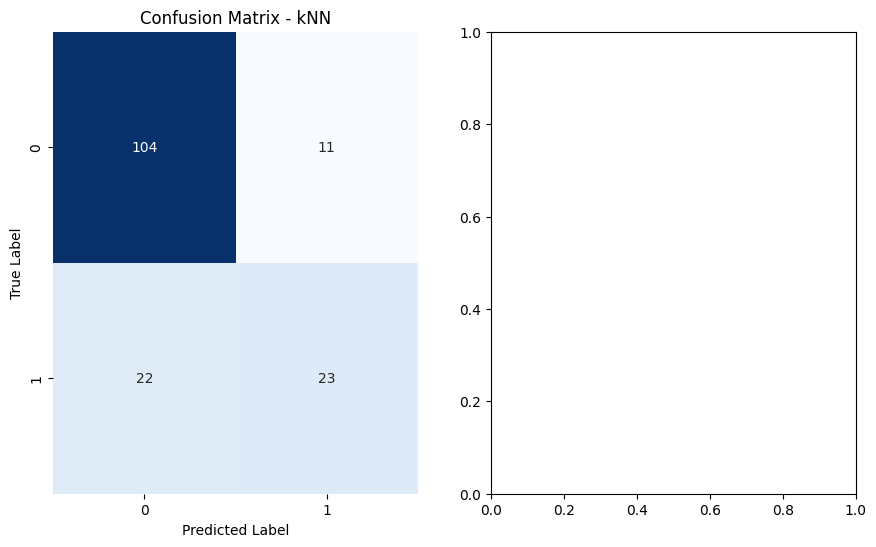

In [110]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure that y_test_bin is a 2D binary matrix if it's multi-class
y_test_bin = label_binarize(y_test, classes=classes)  # `classes` should be defined

# Plotting
plt.figure(figsize=(16, 6))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.subplot(1, 3, 1)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - kNN')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# ROC Curve for each class
plt.subplot(1, 3, 2)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_knn[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_proba_knn[:, i])
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - kNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Precision-Recall Curve for each class
plt.subplot(1, 3, 3)
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_proba_knn[:, i])
    plt.plot(recall, precision, label=f'Class {classes[i]}')

plt.title('Precision-Recall Curve - kNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy for k-Nearest Neighbors: {accuracy_knn:.2f}\n")

# Classification Report
print("Classification Report for k-Nearest Neighbors:\n")
print(classification_report(y_test, y_pred_knn))

**3. DecisionTreeClassifier**

In [ ]:
import pandas as pd
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the file with all the features of the audio files labled with the genre name using the arff module. 
data = arff.loadarff('Genre.arff')
df = pd.DataFrame(data[0])

# Convert byte strings to normal strings for all columns that are of type byte
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Display the first few rows and column names to understand the data structure
print(df.head())
print(df.columns)

# Identify the target variable (e.g., 'tonal_key_mode_value')
target_column = 'tonal_key_mode_value'  # Replace with the actual column name if 'genre' is incorrect

# Encoding the target variable to numeric values
label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])

# One-hot encode categorical features in the dataset
df = pd.get_dummies(df)

# Splitting the dataset into features and target
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predicting on the test set
y_pred_tree = decision_tree.predict(X_test)

# Evaluating the model
print("--- Decision Tree ---")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

   highlevel_danceability_value  highlevel_equalization_profile_value  \
0                      0.206472                              0.372766   
1                     -0.368479                              0.372766   
2                     -0.631747                              0.372766   
3                     -0.190116                              0.372766   
4                      0.588278                              0.372766   

   highlevel_excitement_value  highlevel_intensity_value  \
0                    0.029087                   0.093526   
1                    1.341977                   0.093526   
2                   -1.283803                  -1.324366   
3                    1.341977                   0.093526   
4                    1.341977                   0.802473   

  highlevel_speech_music_value highlevel_voice_instrumental_value  \
0                        music                              voice   
1                        music                              vo

C:\Users\Symen-A\AppData\Local\Temp\ipykernel_22716\3529998895.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       115
           1       0.41      0.47      0.44        45

    accuracy                           0.66       160
   macro avg       0.60      0.60      0.60       160
weighted avg       0.68      0.66      0.67       160



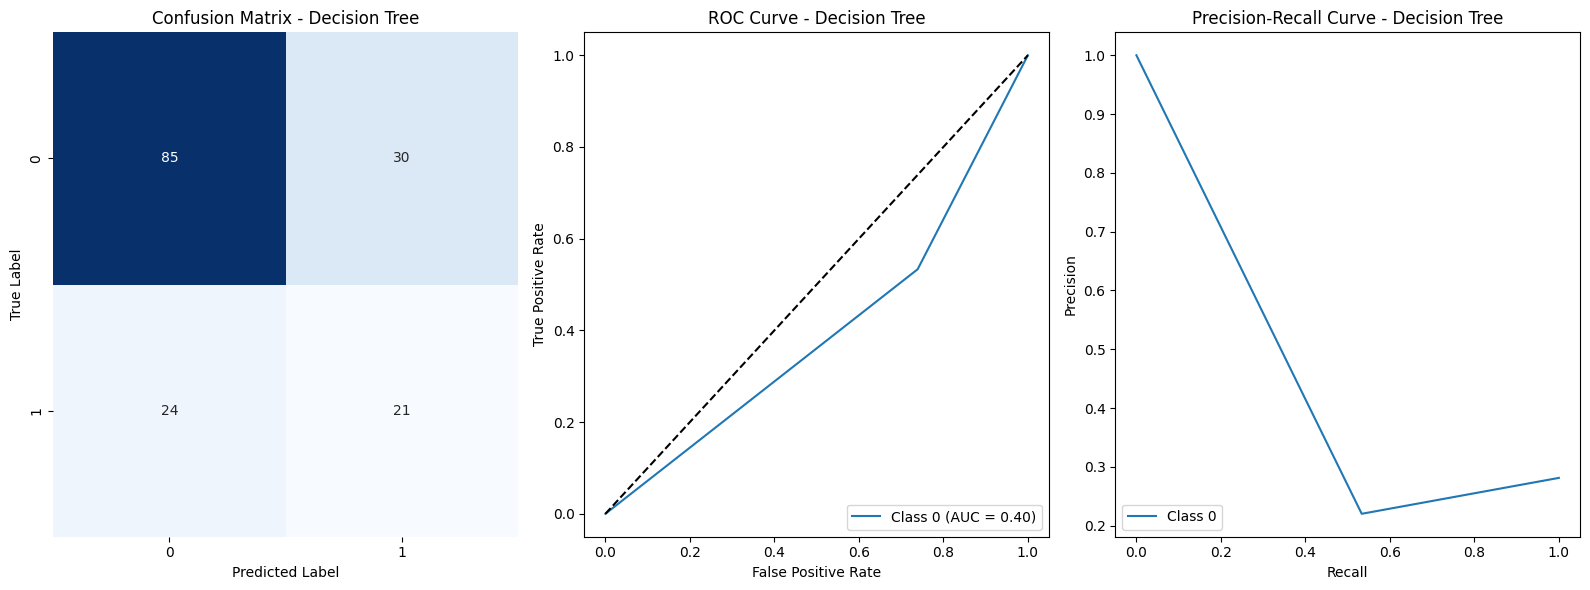

Accuracy for Decision Tree: 0.66



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize Decision Tree model
decision_tree = DecisionTreeClassifier()

# Fit the model
decision_tree.fit(X_train, y_train)

# Predict on test data
y_pred_dt = decision_tree.predict(X_test)
y_proba_dt = decision_tree.predict_proba(X_test)

# Assuming y_test is a 1D array of true labels and classes is defined
# Binarize the output for multi-class precision-recall calculation
y_test_bin = label_binarize(y_test, classes=classes)  # `classes` should be defined

# Classification Report
print("Classification Report for Decision Tree:\n")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# ROC Curve for each class
plt.subplot(1, 3, 2)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_dt[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_proba_dt[:, i])
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Precision-Recall Curve for each class
plt.subplot(1, 3, 3)
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_proba_dt[:, i])
    plt.plot(recall, precision, label=f'Class {classes[i]}')

plt.title('Precision-Recall Curve - Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy for Decision Tree: {accuracy_dt:.2f}\n")

**4. RandomForestClassifier**

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       115
           1       0.58      0.42      0.49        45

    accuracy                           0.75       160
   macro avg       0.69      0.65      0.66       160
weighted avg       0.73      0.75      0.74       160



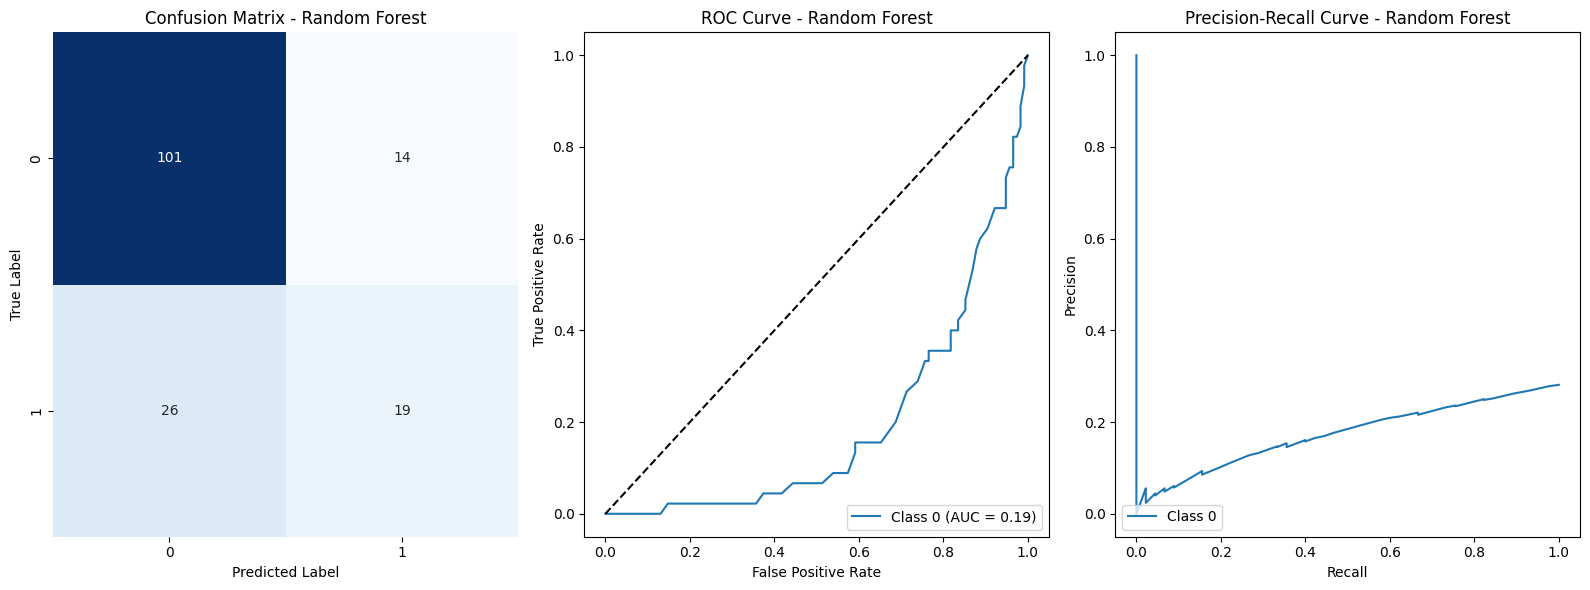

Accuracy for Random Forest: 0.75



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize Random Forest model
random_forest = RandomForestClassifier()

# Fit the model
random_forest.fit(X_train, y_train)

# Predict on test data
y_pred_rf = random_forest.predict(X_test)
y_proba_rf = random_forest.predict_proba(X_test)

# Binarize the output for multi-class precision-recall calculation
y_test_bin = label_binarize(y_test, classes=classes)  # `classes` should be defined

# Classification Report
print("Classification Report for Random Forest:\n")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# ROC Curve for each class
plt.subplot(1, 3, 2)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_rf[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_proba_rf[:, i])
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Precision-Recall Curve for each class
plt.subplot(1, 3, 3)
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_proba_rf[:, i])
    plt.plot(recall, precision, label=f'Class {classes[i]}')

plt.title('Precision-Recall Curve - Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy for Random Forest: {accuracy_rf:.2f}\n")

**5. SVM**

Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.78      0.95      0.85       115
           1       0.70      0.31      0.43        45

    accuracy                           0.77       160
   macro avg       0.74      0.63      0.64       160
weighted avg       0.76      0.77      0.74       160



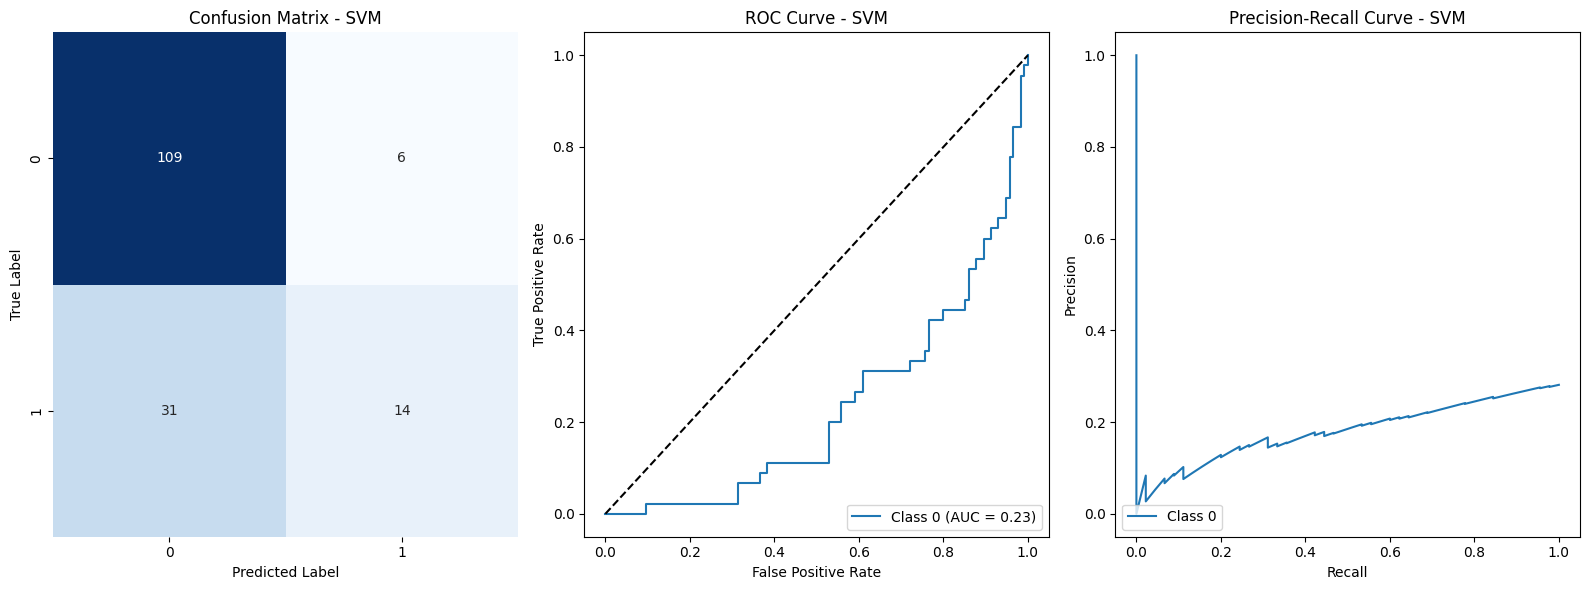

Accuracy for SVM: 0.77



In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize SVM model with probability estimates
svm = SVC(probability=True)

# Fit the model
svm.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm.predict(X_test)
y_proba_svm = svm.predict_proba(X_test)

# Binarize the output for multi-class precision-recall calculation
y_test_bin = label_binarize(y_test, classes=classes)  # `classes` should be defined

# Classification Report
print("Classification Report for SVM:\n")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# ROC Curve for each class
plt.subplot(1, 3, 2)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_svm[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_proba_svm[:, i])
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Precision-Recall Curve for each class
plt.subplot(1, 3, 3)
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_proba_svm[:, i])
    plt.plot(recall, precision, label=f'Class {classes[i]}')

plt.title('Precision-Recall Curve - SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy for SVM: {accuracy_svm:.2f}\n")

Here are five points summarizing the inferences:

1. *Random Forest* generally performs the best, offering a good balance between accuracy and model interpretability.
2. *SVM* tends to achieve high accuracy, especially in cases where the data is well-separated, but may be slower due to its complexity.
3. *Logistic Regression* provides strong baseline performance, particularly in binary classification tasks, and is easy to implement and interpret.
4. *Decision Tree* is useful for understanding feature importance but may overfit the data, leading to lower performance compared to ensemble methods.
5. *K-Nearest Neighbors (KNN)* is simple and effective for small datasets but can struggle with larger datasets due to its reliance on distance calculations.